In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [6]:
path = (r"C:\Users\Jwpel\Downloads")
input_data = "\airline_delays.csv"
df = pd.read_csv(filepath_or_buffer=(r"C:\Users\Jwpel\Downloads\airline_delays.csv")
                                     ,sep=',', encoding="latin1")
df.head(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2016,3,AA,American Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",1605.0,354.0,84.10,6.60,...,2.71,99.18,2.0,2.0,20884.0,5682.0,239.0,7110.0,93.0,7760.0
1,2016,3,AA,American Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",3410.0,692.0,214.57,14.67,...,1.53,213.01,12.0,1.0,43858.0,17793.0,1118.0,8269.0,39.0,16639.0
2,2016,3,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",12278.0,2296.0,603.86,83.44,...,4.85,854.54,90.0,49.0,163505.0,58510.0,8796.0,33006.0,647.0,62546.0
3,2016,3,AA,American Airlines Inc.,OKC,"Oklahoma City, OK: Will Rogers World",168.0,35.0,10.29,4.33,...,0.00,17.06,3.0,0.0,2491.0,606.0,339.0,83.0,0.0,1463.0
4,2016,3,AA,American Airlines Inc.,OGG,"Kahului, HI: Kahului Airport",182.0,72.0,35.15,0.00,...,0.00,9.32,3.0,1.0,4359.0,2656.0,0.0,863.0,0.0,840.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 21 columns):
year                   1004 non-null int64
 month                 1004 non-null int64
carrier                1004 non-null object
carrier_name           1004 non-null object
airport                1004 non-null object
airport_name           1004 non-null object
arr_flights            1003 non-null float64
arr_del15              1003 non-null float64
carrier_ct             1003 non-null float64
 weather_ct            1003 non-null float64
nas_ct                 1003 non-null float64
security_ct            1003 non-null float64
late_aircraft_ct       1003 non-null float64
arr_cancelled          1003 non-null float64
arr_diverted           1003 non-null float64
 arr_delay             1003 non-null float64
 carrier_delay         1003 non-null float64
weather_delay          1003 non-null float64
nas_delay              1003 non-null float64
security_delay         1003 non-null float64
l

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["arr_flights_scaled"] = scaler.fit_transform(df["arr_flights"].values.reshape(-1,1))
df["arr_del15_scaled"] = scaler.fit_transform(df["arr_del15"].values.reshape(-1,1))


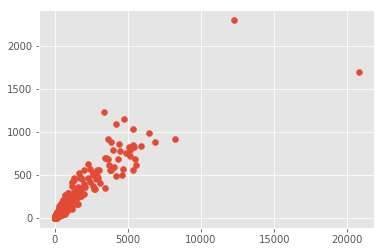

In [13]:
plt.scatter(df.arr_flights, df.arr_del15)

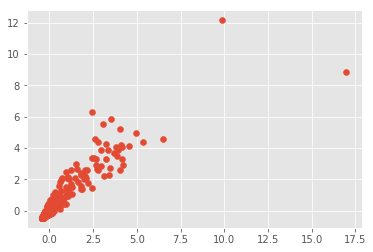

In [14]:
plt.scatter(df.arr_flights_scaled, df.arr_del15_scaled)

In [15]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
df["arr_flights_minMax"]=mm_scaler.fit_transform(df["arr_flights"].values.reshape(-1,1))
df["arr_del15_minMax"]=mm_scaler.fit_transform(df["arr_del15"].values.reshape(-1,1))

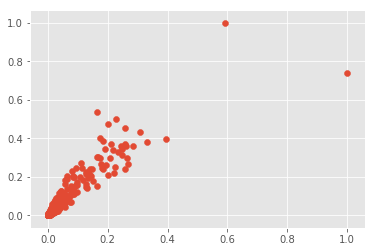

In [17]:
plt.scatter(df.arr_flights_minMax, df.arr_del15_minMax)

In [20]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
df["arr_flights_robust"]=r_scaler.fit_transform(df["arr_flights"].values.reshape(-1,1))
df["arr_del15_robust"]=r_scaler.fit_transform(df["arr_del15"].values.reshape(-1,1))

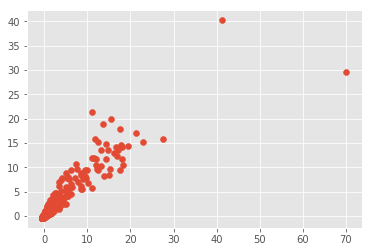

In [21]:
plt.scatter(df.arr_flights_robust, df.arr_del15_robust)

In [22]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_flights_scaled,arr_del15_scaled,arr_flights_minMax,arr_del15_minMax,arr_flights_robust,arr_del15_robust
count,1004.0,1004.0,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,...,1003.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1.003000e+03,1003.000000,1003.000000,1003.000000,1003.000000
mean,2016.0,3.0,477.688933,82.322034,22.192802,2.162792,27.982951,0.191725,29.792144,4.718843,...,173.259222,1298.818544,7.925224,1878.171486,-1.676957e-17,7.466056e-17,0.022928,0.035855,1.146652,1.049948
std,0.0,0.0,1196.940263,182.339468,47.484109,6.027646,69.845534,0.756819,71.834778,16.288097,...,518.716382,3850.080854,37.911750,4581.374651,1.000499e+00,1.000499e+00,0.057570,0.079416,4.064313,3.227247
min,2016.0,3.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-3.984549e-01,-4.517020e-01,0.000000,0.000000,-0.471986,-0.407080
25%,2016.0,3.0,61.000000,8.000000,2.550000,0.000000,1.910000,0.000000,2.050000,0.000000,...,0.000000,60.000000,0.000000,113.000000,-3.483021e-01,-4.078059e-01,0.002886,0.003484,-0.268251,-0.265487
50%,2016.0,3.0,140.000000,23.000000,7.340000,0.480000,5.660000,0.000000,6.620000,1.000000,...,22.000000,211.000000,0.000000,405.000000,-2.822676e-01,-3.255007e-01,0.006686,0.010017,0.000000,0.000000
75%,2016.0,3.0,355.500000,64.500000,19.265000,1.635000,15.340000,0.000000,21.580000,4.000000,...,129.000000,581.000000,0.000000,1446.000000,-1.021353e-01,-9.778972e-02,0.017051,0.028092,0.731749,0.734513
max,2016.0,3.0,20792.000000,2296.000000,604.450000,83.440000,749.320000,8.540000,854.540000,215.000000,...,8796.000000,51468.000000,647.000000,62546.000000,1.698033e+01,1.214648e+01,1.000000,1.000000,70.125637,40.230088
